In [2]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2 import model_zoo

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("_train", {}, "./coco_dataset/train/_annotations.coco.json", "./coco_dataset/train")
register_coco_instances("_val", {}, "./coco_dataset/valid/_annotations.coco.json", "./coco_dataset/valid")
register_coco_instances("_test", {}, "./coco_dataset/test/_annotations.coco.json", "./coco_dataset/test")

In [4]:
from detectron2.data import MetadataCatalog
MetadataCatalog.get("_train").thing_classes = ["sigal", "stray", "target"]
MetadataCatalog.get("_val").thing_classes = ["sigal", "stray", "target"]
MetadataCatalog.get("_test").thing_classes = ["sigal", "stray", "target"]

In [5]:
class Detector:
    def __init__(self, model_type="OD") -> None:
        self.cfg = get_cfg()
        if model_type == "OD":
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
            # self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_C4_3x.yaml")
            self.cfg.MODEL.WEIGHTS = "../weights/model_final.pth"
            self.cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3

        elif model_type == "IS":
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

        self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
        self.cfg.MODEL.DEVICE = "cpu"
        self.cfg.DATASETS.TRAIN = ("_train",)
        self.cfg.DATASETS.TEST = ("_val",)


        self.predictor = DefaultPredictor(self.cfg)

    def onImage(self, imagePath):
        image0 = cv2.imread(imagePath)
        image = cv2.resize(image0, (256, 240)) 
        predictions = self.predictor(image)


#         print(predictions['instances'])
        category_id = predictions['instances'].get("pred_classes").numpy()
        if 2 in category_id:

            viz = Visualizer(image[:,:,::-1],
                             metadata=MetadataCatalog.get("_train"),
            instance_mode=ColorMode.IMAGE)

            output = viz.draw_instance_predictions(predictions["instances"].to("cpu"))
            coordinates = []
            for i in predictions["instances"].pred_boxes.tensor.numpy():
                coordinates.append(Detector.BoxCenter(i))

    #         cv2.imshow("", output.get_image()[:,:,::-1])

            plt.imshow(cv2.cvtColor(output.get_image()[...,::-1], cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
            
    #         cv2.waitKey(500)
            plt.show()
            return coordinates
    def BoxCenter(box_coordinates):
        x1, x2, y1, y2 = box_coordinates[0], box_coordinates[2], box_coordinates[1], box_coordinates[2]
        return (x1 + x2) / 2, (y1 + y2) / 2

In [6]:
detector = Detector(model_type="OD")

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


In [7]:
from time import time

In [18]:
import os
fragments = os.listdir('../SO_201207_153155/')
fragments.sort()
print(fragments)

['0_0_0.png', '10_512_0.png', '11_512_240.png', '12_512_480.png', '13_512_720.png', '14_512_960.png', '15_768_0.png', '16_768_240.png', '17_768_480.png', '18_768_720.png', '19_768_960.png', '1_0_240.png', '20_1024_0.png', '21_1024_240.png', '22_1024_480.png', '23_1024_720.png', '24_1024_960.png', '25_1280_0.png', '26_1280_240.png', '27_1280_480.png', '28_1280_720.png', '29_1280_960.png', '2_0_480.png', '30_1536_0.png', '31_1536_240.png', '32_1536_480.png', '33_1536_720.png', '34_1536_960.png', '35_1792_0.png', '36_1792_240.png', '37_1792_480.png', '38_1792_720.png', '39_1792_960.png', '3_0_720.png', '4_0_960.png', '5_256_0.png', '6_256_240.png', '7_256_480.png', '8_256_720.png', '9_256_960.png']


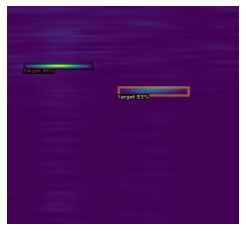

[(56.54869842529297, 78.57704162597656),
 (161.63645935058594, 144.69967651367188)]

In [80]:
detector.onImage('../SO_201207_153155/337_251.png')

In [10]:


most_timer = time()
for i in fragments:
    timer = time()
    detector.onImage(f"{'../SO_201207_153155/'}{i}")
    print(f"{i} Prediction time -> ", timer - time())

# print("Most Prediction time -> ", most_timer - time())


0_0.png Prediction time ->  -11.561103105545044
0_240.png Prediction time ->  -9.52568507194519
256_240.png Prediction time ->  -9.422028541564941
256_0.png Prediction time ->  -9.52875280380249
